In [1]:
#Imported all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#Connected the CSV file with jupyter notebook
df = pd.read_csv('C:/Users/baps/OneDrive/Desktop/Alfido Tech/Bharat Intern train.csv')

In [3]:
#Perform Exploratory Data Analysis
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: xlabel='Survived', ylabel='count'>

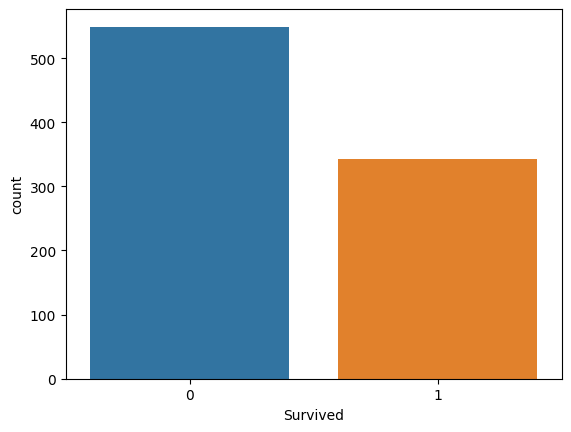

In [7]:
#Ploted the graph of Survived people and unsurvived
sns.countplot(x='Survived',data=df)

<AxesSubplot: xlabel='Survived', ylabel='count'>

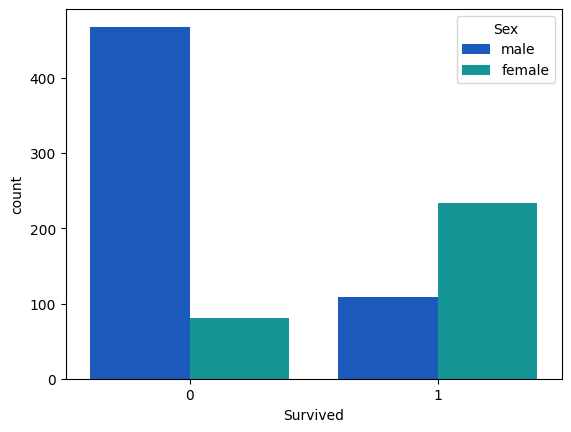

In [8]:
#Ploted bar chart to see how gender present in Both Survived and Unsurvived
sns.countplot(x='Survived',hue='Sex',data=df,palette='winter')

<AxesSubplot: xlabel='Survived', ylabel='count'>

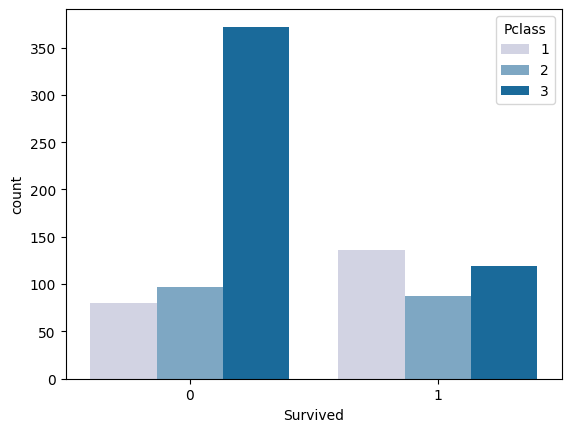

In [9]:
sns.countplot(x='Survived',hue='Pclass',data= df,palette='PuBu')

<AxesSubplot: ylabel='Frequency'>

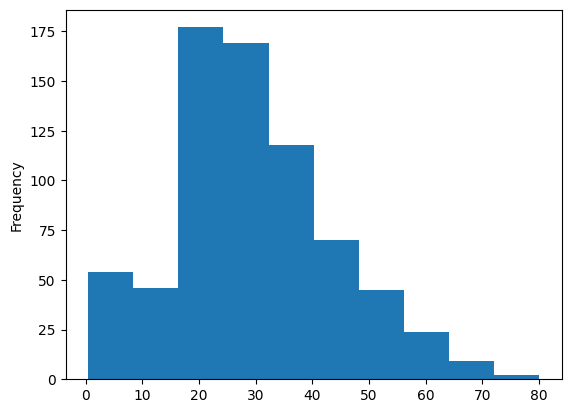

In [10]:
#Ploted Bar chart to see ages present in dataset
df['Age'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

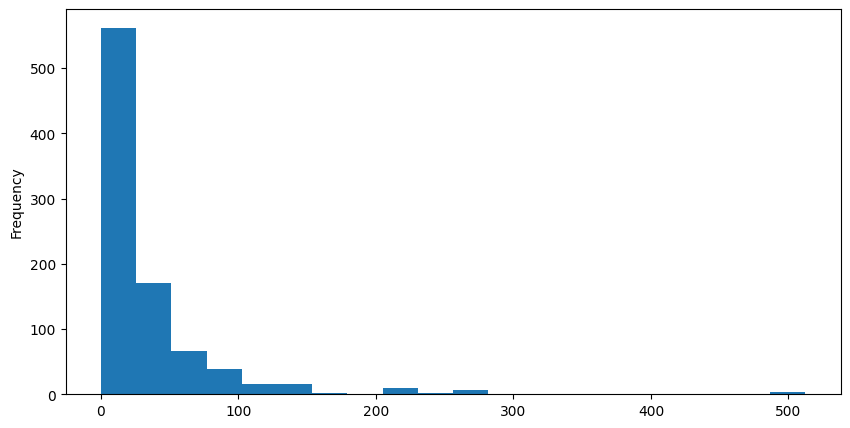

In [11]:
df['Fare'].plot.hist(figsize=(10,5),bins=20)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

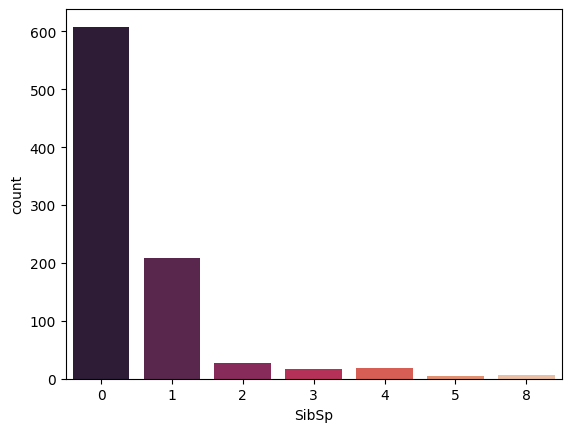

In [12]:
sns.countplot(x='SibSp',data=df, palette='rocket')

<AxesSubplot: ylabel='Frequency'>

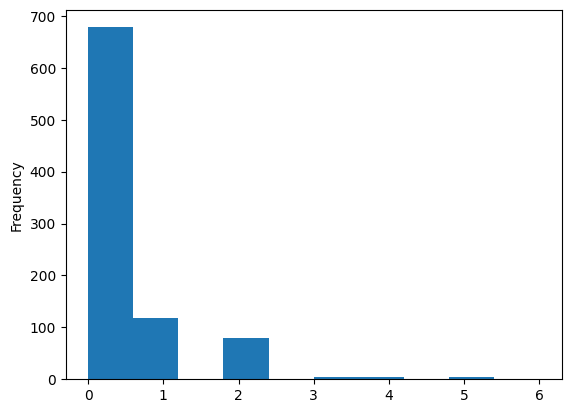

In [13]:
df['Parch'].plot.hist()

<AxesSubplot: xlabel='Parch', ylabel='count'>

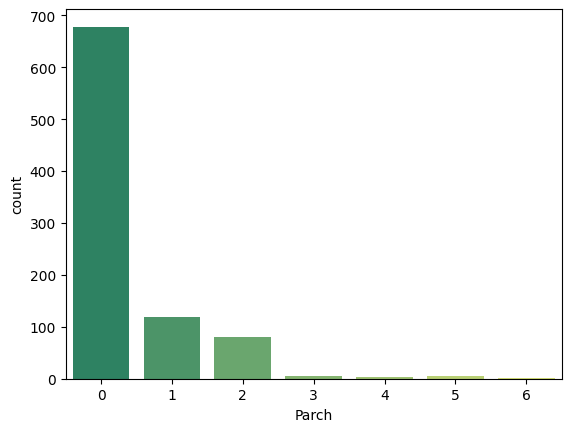

In [14]:
sns.countplot(x='Parch', data=df , palette='summer')

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#Drop the Null values presnt in dataset
df.dropna(inplace=True)

<AxesSubplot: >

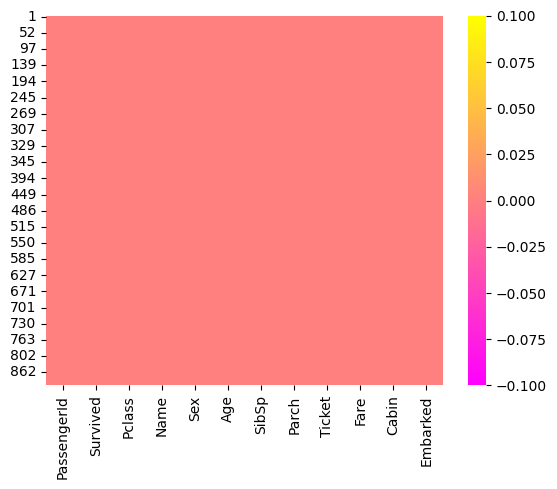

In [17]:
#Heatmap to see how many Null values present in Dataset
sns.heatmap(df.isnull(),cmap='spring')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

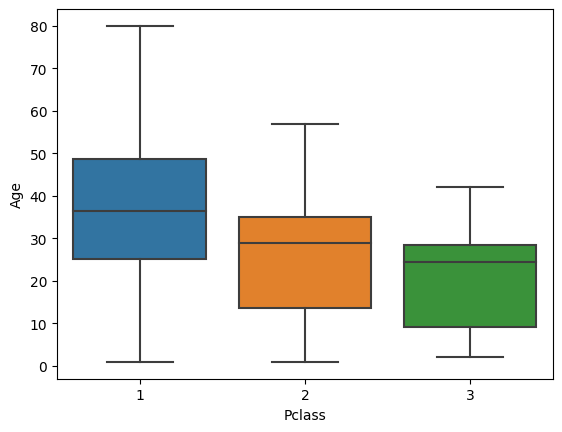

In [18]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [20]:
#Dropout the cabin column which contains large amount of zeros
df.drop(['Cabin'],axis=1,inplace=True)

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [23]:
embark=pd.get_dummies(df['Embarked'])
embark.head()

,C,Q,S
1,1,0,0
3,0,0,1
6,0,0,1
10,0,0,1
11,0,0,1


In [24]:
pcl=pd.get_dummies(df['Pclass'],drop_first = True)
pcl.head()

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [25]:
df= pd.concat([df,sex,embark,pcl], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,0,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,0,0,0,1,0,0


In [26]:
#Dropout the string values present in Dataset
df.drop(['Name','PassengerId','Pclass',"Ticket",'Sex','Embarked'],axis=True, inplace=True)

In [27]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,2,3
1,1,38.0,1,0,71.2833,0,1,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,0,1,0,0


In [28]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=4)

In [30]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X_train.dropna()

,Age,SibSp,Parch,Fare,male,C,Q,S,2,3
632,32.0,0,0,30.5000,1,1,0,0,0,0
66,29.0,0,0,10.5000,0,0,0,1,1,0
174,56.0,0,0,30.6958,1,1,0,0,0,0
862,48.0,0,0,25.9292,0,0,0,1,0,0
701,35.0,0,0,26.2875,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
445,4.0,0,2,81.8583,1,0,0,1,0,0
515,47.0,0,0,34.0208,1,0,0,1,0,0
630,80.0,0,0,30.0000,1,0,0,1,0,0
853,16.0,0,1,39.4000,0,0,0,1,0,0


In [31]:
#Created logistic regression model that is going to predict the outcome
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\baps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
#testing the model on Test set
prediction = model.predict(X_test)

In [33]:
#Created confusion matrix
confusion_matrix(y_test,prediction)

array([[14,  9],
       [10, 28]], dtype=int64)

In [34]:
#Check the Accuracy of matrix
accuracy_score(y_test,prediction)

0.6885245901639344